In [3]:
import pandas as pd # python에서의 엑셀과 같은 역할
import numpy as np # 계산을 편하게 해 주는 라이브러리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

import matplotlib.ticker as ticker # 시각화
import matplotlib.dates as mdates # 시각화

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%time
# csv 로딩 시간 표기.
# csv파일 경로 지정( 만약, 좌상단의 구글드라이브 연결 버튼 클릭할 때 코드가 자동 완성된 셀이 나온다면 반드시 실행 )
df = pd.read_csv('/content/drive/MyDrive/ProductAnalysis/mlb.csv')
df_base = df.copy()

CPU times: user 2.82 s, sys: 587 ms, total: 3.41 s
Wall time: 4.67 s


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761618 entries, 0 to 761617
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   gameId                761618 non-null  object
 1   seasonType            761618 non-null  object
 2   year                  761618 non-null  int64 
 3   startTime             761618 non-null  object
 4   attendance            761618 non-null  int64 
 5   duration              761618 non-null  object
 6   awayTeamName          761618 non-null  object
 7   homeTeamName          761618 non-null  object
 8   venueName             761618 non-null  object
 9   venueSurface          761618 non-null  object
 10  venueCapacity         761618 non-null  int64 
 11  inningNumber          761618 non-null  int64 
 12  inningHalf            761618 non-null  object
 13  pitchSpeed            761618 non-null  int64 
 14  outcomeDescription    733839 non-null  object
 15  hitterId         

In [7]:
df_base.describe()

,year,attendance,venueCapacity,inningNumber,pitchSpeed,hitterWeight,hitterHeight,is_ab,is_ab_over,is_hit,is_on_base,is_bunt,is_bunt_shown,is_double_play,is_triple_play,is_wild_pitch,is_passed_ball
count,761618.0,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000
mean,2016.0,30154.393977,42957.315234,5.091765,82.816152,199.713903,70.415032,0.218077,0.243069,0.055773,0.072211,0.006551,0.005159,0.005803,0.000011,0.002390,0.000490
std,0.0,9774.041646,5173.463121,2.684819,21.824114,44.012705,13.870694,0.412940,0.428937,0.229484,0.258837,0.080670,0.071639,0.075959,0.003241,0.048826,0.022125
min,2016.0,8766.000000,12500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,22274.000000,39021.000000,3.000000,83.000000,190.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,30293.000000,42060.000000,5.000000,89.000000,205.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,38044.000000,47476.000000,7.000000,93.000000,220.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,53621.000000,56000.000000,19.000000,105.000000,305.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-----

* 참고: 변수 표기 방식 ['컨벤션' 으로 통칭]
    - 파스칼( PascalCase ): 함수 혹은 클래스 이름에 주로 적용 [단어의 첫글자를 대문자로 씀]
    - 카멜( camelCase ): 변수 혹은 컬럼에 주로 적용
    - 스네이크( snake_case ): 변수 혹은 컬럼에 주로 적용 [단어 사이에(_)를 삽입]

In [8]:
df_base.rename(
    columns = {
        'gameId': 'game_id',
        'seasonType': 'season_type',
        'startTime': 'start_time',
        'awayTeamName': 'away_team_name',
        'homeTeamName': 'home_team_name',
        'venueName': 'venue_name',
        'venueSurface': 'venue_surface',
        'venueCapacity': 'venue_capacity',
        'inningNumber': 'inning_number',
        'inningHalf': 'inning_half',
        'pitchSpeed': 'pitch_speed',
        'outcomeDescription': 'outcome_description',
        'hitterId': 'hitter_id',
        'hitterWeight': 'hitter_weight',
        'hitterHeight': 'hitter_height',
        'hitterBatHand': 'hitter_bat_hand',
        'pitcherId': 'pitcher_id',
        'pitcherThrowHand': 'pitcher_throw_hand',
        'pitchType': 'pitch_type',
        'pitchTypeDescription': 'pitch_type_description',
    },
    inplace = True  #df_base 데이터프레임에 덮어쓰기
)

In [9]:
df_base.head()

,game_id,season_type,year,start_time,attendance,duration,away_team_name,home_team_name,venue_name,venue_surface,venue_capacity,inning_number,inning_half,pitch_speed,outcome_description,hitter_id,hitter_weight,hitter_height,hitter_bat_hand,pitcher_id,pitcher_throw_hand,pitch_type,pitch_type_description,is_ab,is_ab_over,is_hit,is_on_base,is_bunt,is_bunt_shown,is_double_play,is_triple_play,is_wild_pitch,is_passed_ball
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,82,Foul Ball,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,0,0,0,0,0,0,0,0,0,0
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,82,Double,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,1,1,1,1,0,0,0,0,0,0
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,91,Single,3e39fe20-6dca-4894-807b-1ce76ff93e29,190,70,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,1,1,1,0,0,0,0,0,0
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,91,Triple,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,1,1,1,0,0,0,0,0,0
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,Diamondbacks,Rockies,Coors Field,grass,50398,8,TOP,90,Strike Swinging,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,0,0,0,0,0,0,0,0,0,0


In [10]:
df_base.columns.tolist() #컬럼 리스트로 출력
#sorted(df_base.columns.tolist()) #컬럼 리스트 abc 순으로 출력

['game_id',
 'season_type',
 'year',
 'start_time',
 'attendance',
 'duration',
 'away_team_name',
 'home_team_name',
 'venue_name',
 'venue_surface',
 'venue_capacity',
 'inning_number',
 'inning_half',
 'pitch_speed',
 'outcome_description',
 'hitter_id',
 'hitter_weight',
 'hitter_height',
 'hitter_bat_hand',
 'pitcher_id',
 'pitcher_throw_hand',
 'pitch_type',
 'pitch_type_description',
 'is_ab',
 'is_ab_over',
 'is_hit',
 'is_on_base',
 'is_bunt',
 'is_bunt_shown',
 'is_double_play',
 'is_triple_play',
 'is_wild_pitch',
 'is_passed_ball']

# data 확인

### distinct value 확인

In [ ]:
# 시즌
df_base['year'].unique().tolist()

[2016]

In [ ]:
# 경기 종류
df_base['season_type'].unique().tolist()

['REG']

In [ ]:
# 경기장
# df_base['venue_name'].unique().tolist()
sorted(df_base['venue_name'].unique().tolist())  

['AT&T Park',
 'Angel Stadium of Anaheim',
 'Busch Stadium',
 'Chase Field',
 'Citi Field',
 'Citizens Bank Park',
 'Comerica Park',
 'Coors Field',
 'Dodger Stadium',
 'Fenway Park',
 'Fort Bragg',
 'Globe Life Park in Arlington',
 'Great American Ball Park',
 'Kauffman Stadium',
 'Marlins Park',
 'Miller Park',
 'Minute Maid Park',
 'Nationals Park',
 'Oakland Coliseum',
 'Oriole Park at Camden Yards',
 'PETCO Park',
 'PNC Park',
 'Progressive Field',
 'Rogers Centre',
 'Safeco Field',
 'Target Field',
 'Tropicana Field',
 'Turner Field',
 'U.S. Cellular Field',
 'Wrigley Field',
 'Yankee Stadium']

In [ ]:
# 타석 결과
df_base['outcome_description'].unique().tolist()

['Foul Ball',
 'Double',
 'Single',
 'Triple',
 'Strike Swinging',
 'SEE RUNNER(S) OUTCOME',
 'Homerun',
 'Ball',
 'Dirt Ball',
 'Strike Looking',
 nan,
 'Fly Out',
 'Ground Out',
 'Foul Tip',
 'Line Out',
 'Fielders Choice',
 'Pop Out',
 'Reached on error',
 'Single - Out at 2nd',
 'Sacrifice Bunt',
 'Intentional Ball',
 'Sacrifice Fly',
 'Single-Adv-2nd',
 'Hit by pitch',
 'Sacrifice Bunt-Adv-1st',
 ' Strike Swinging - Out at Home',
 'Pitch Out',
 "Fielder's Choice-Adv-2nd",
 'Double Out at 3rd',
 'Reached on error-Adv-2nd',
 'Reached on error-Adv-3rd',
 'Single-Adv-3rd',
 'Balk',
 'Strike-swinging-Adv-1st',
 'Double-Adv-3rd',
 'Catcher Interference',
 'Fielders Choice - Out at 2nd',
 'Sacrifice Fly-Adv-1st',
 'Triple - Out at Home',
 'Single-Adv-Home',
 'Reached On Error - Out at 2nd',
 'Double-Adv-Home',
 'Sacrifice Bunt-Adv-2nd',
 'Triple-Adv-Home',
 'Strike Looking - Out at 1st',
 'Sacrifice Fly-Adv-2nd',
 'Single - Out at 3rd',
 'Strike-looking-Adv-1st']

In [ ]:
# 타자 주 사용 손
df_base['hitter_bat_hand'].unique().tolist()

['R', 'L', 'B', nan]

In [ ]:
# 투수 주 사용 손
df_base['pitcher_throw_hand'].unique().tolist()

['R', 'L', nan, 'B']

In [ ]:
# 투구(구종) 타입
df_base['pitch_type'].unique().tolist()

['SL', 'SI', 'CT', nan, 'FA', 'CU', 'CH', 'KN', 'SP', 'IB', 'PI', 'SC', 'FO']

## 1-1. 야구경기

In [11]:
# 필요한, 적당한 컬럼 선정하여 가져오기
df_game_semi = df_base[['game_id','season_type','year','start_time','attendance','duration','inning_number','away_team_name','home_team_name','venue_name','venue_surface','venue_capacity']]
df_game_semi

,game_id,season_type,year,start_time,attendance,duration,inning_number,away_team_name,home_team_name,venue_name,venue_surface,venue_capacity
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,REG,2016,2016-05-11 19:10:00 UTC,34890,3:19,8,Diamondbacks,Rockies,Coors Field,grass,50398
...,...,...,...,...,...,...,...,...,...,...,...,...
761613,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,3,Mets,Braves,Turner Field,grass,49586
761614,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,6,Mets,Braves,Turner Field,grass,49586
761615,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,7,Mets,Braves,Turner Field,grass,49586
761616,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,REG,2016,2016-04-24 17:35:00 UTC,32085,2:56,7,Mets,Braves,Turner Field,grass,49586


In [12]:
# game_id를 기준으로, 각 중복된 값을 제외하고 고유의 값을 가져오기: max 활용
# 어느 경기장에서 경기가 언제 시작했는 지, 관중들은 몇 명인 지, 경기 시간은 어떻게 되는 지 등
# df_game_semi의 groupby 결과(우변)를, 새로운 df( df_game )로 선언
df_game = df_game_semi.groupby(['game_id']).agg(
                                            start_at = ('start_time', 'max'),
                                            attendance = ('attendance', 'max'),
                                            capacity = ('venue_capacity', 'max'),
                                            ground_name = ('venue_name', 'max'),
                                            duration = ('duration', 'max'),
                                            inning = ('inning_number', 'max'),
                                            home_team = ('home_team_name', 'max')
                                        ).reset_index()
df_game
#df_game = df_game_semi.groupby(['groupby를 하는 기준']).agg(
#    start_at 컬럼 할당 = ('satrt_time'컬럼의, 집계방식 'max' 추출),
#    column_2 = ('다른 컬럼', '집계 방식'→ max, count, nunique, sum, lambda' )) 

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins
...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins


In [ ]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      2428 non-null   object
 1   start_at     2428 non-null   object
 2   attendance   2428 non-null   int64 
 3   capacity     2428 non-null   int64 
 4   ground_name  2428 non-null   object
 5   duration     2428 non-null   object
 6   inning       2428 non-null   int64 
 7   home_team    2428 non-null   object
dtypes: int64(3), object(5)
memory usage: 151.9+ KB


In [13]:
# 각 경기장에서 치른 경기 수 확인
# → MLB는 정규 리그 1 시즌 1 팀 162경기
df_game.groupby(['ground_name']).agg(game_cnts = ('game_id', 'nunique')).reset_index()

,ground_name,game_cnts
0,AT&T Park,81
1,Angel Stadium of Anaheim,81
2,Busch Stadium,81
3,Chase Field,81
4,Citi Field,81
5,Citizens Bank Park,81
6,Comerica Park,80
7,Coors Field,81
8,Dodger Stadium,81
9,Fenway Park,81


### 컬럼 생성: date

In [ ]:
# 각 컬럼들의 타입을 확인
# 날짜처럼 보이는 start_at의 데이터 형태를 확인 해 보기
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      2428 non-null   object
 1   start_at     2428 non-null   object
 2   attendance   2428 non-null   int64 
 3   capacity     2428 non-null   int64 
 4   ground_name  2428 non-null   object
 5   duration     2428 non-null   object
 6   inning       2428 non-null   int64 
 7   home_team    2428 non-null   object
dtypes: int64(3), object(5)
memory usage: 151.9+ KB


In [ ]:
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins


In [14]:
# 날짜 데이터 생성 해 주기: 날짜처럼 보이지만 실제로 문자열( object )인 start_at 컬럼을 슬라이스 해 준다.
df_game['start_date'] = df_game['start_at'].str.slice(start = 0, stop = 10)
df_game['start_date'] = pd.to_datetime(df_game['start_date'], format = '%Y-%m-%d')  #%Y > yyyy(연도수 4자리 표현), %m > 월 2자리 수 표현, %d > 일 2자리수 표현
#df_game['start_month'] = df_game['start_date'].dt.dayofweek 요일을 1~7 숫자로 표현. 월을 0로 카운트할 수도 있고, 일요일을 1로 카운트할 수도 있음. 판다스 자체 함수로 구글링으로 보는게 빠름
df_game['start_month'] = df_game['start_date'].dt.month
df_game

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7
...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6


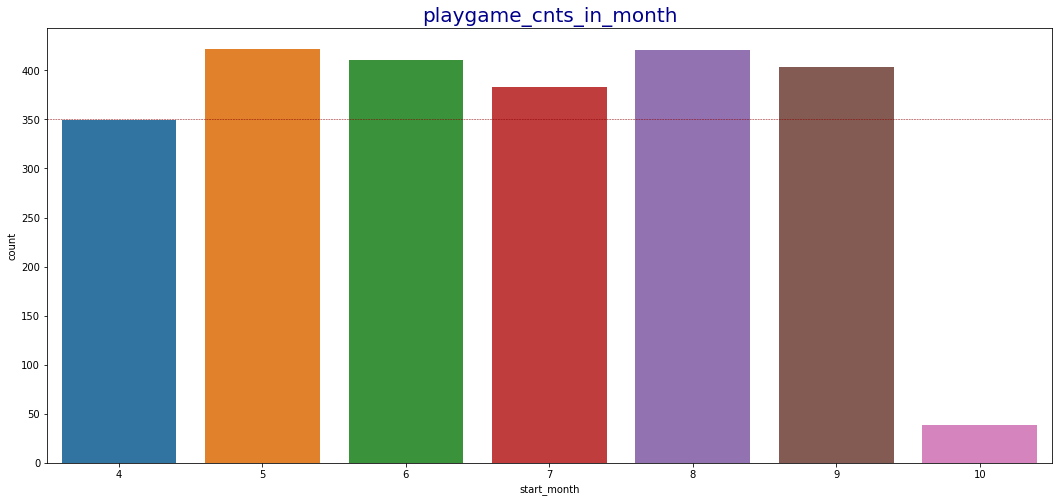

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.countplot(
    data = df_game,
    x = 'start_month'
)
plt.title(f'playgame_cnts_in_month', fontsize = 20, color = 'darkblue')
plt.axhline(350, color = 'darkred', linestyle = '--', linewidth = 0.5)  # 차트상의 y축 선을 작도함으로 막대의 수치 확인 명확
plt.show()

### 컬럼생성: 관중 점유율

In [16]:
# 관중 점유율 컬럼 생성
df_game['occupied_ratio'] = df_game['attendance']/df_game['capacity']
df_game

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.008570
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618
...,...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8,0.379763
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5,0.816786
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9,0.844010
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6,0.551677


In [17]:
# 관중 점유율 전처리
df_game['occupied_ratio'] = np.where(
                                    df_game['occupied_ratio'] >= 1, ##조건
                                    1, ## 조건을 만족하면 반환시킬 값(occupied_ratio가 1이 넘는 경우가 있음. 관중 점유율 100%가 넘는 경우는 100%로 변환)
                                    df_game['occupied_ratio'] ## 조건을 만족시키지 않으면 반환시킬 값
                                    )  

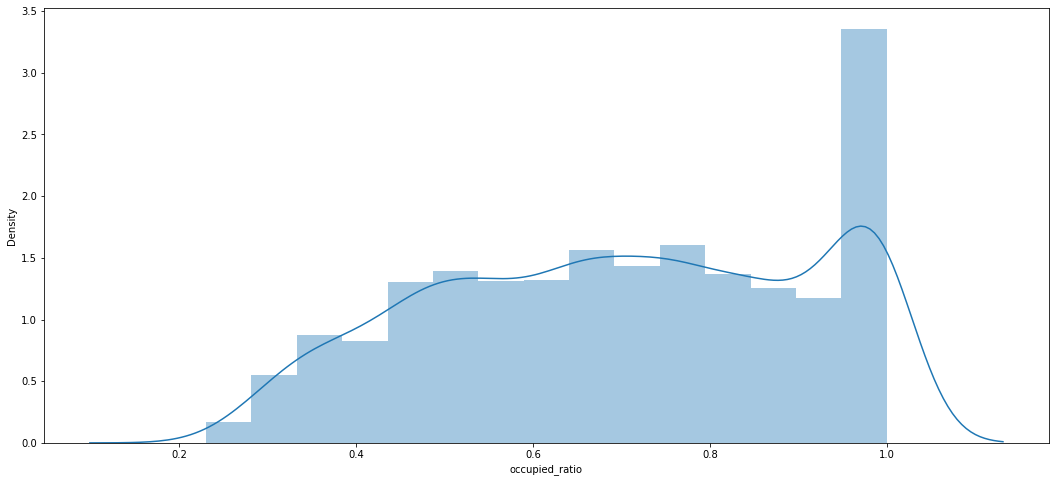

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.distplot(
    df_game['occupied_ratio'],
    hist = True  # 히스토그램 표현
    #hist = False # 히스토그램 불표현
)

plt.show()

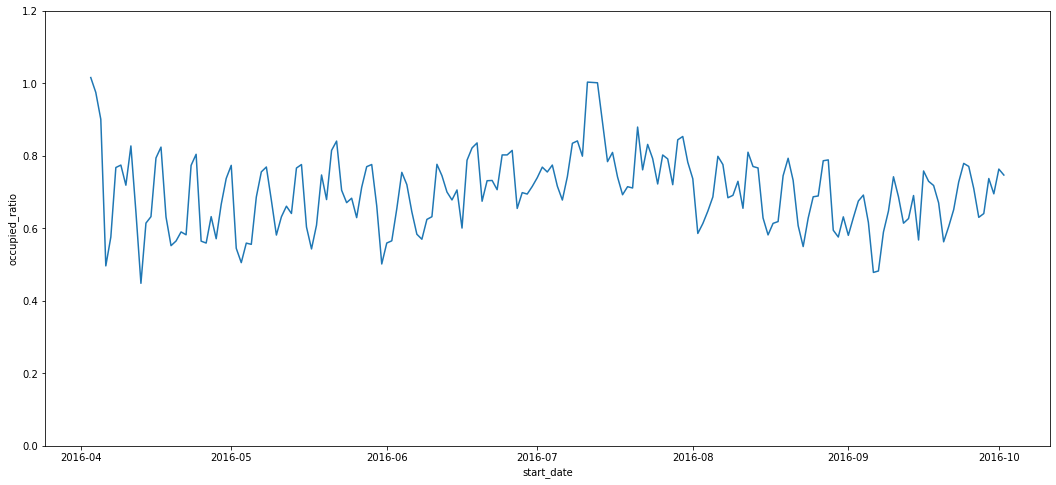

In [19]:
# daily 관중 점유율
temp_df = df_game.groupby(['start_date']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'start_date',
    y = 'occupied_ratio'
)

plt.ylim([0, 1.2])  # y축 범위 지정(0 ~ 1.2)
plt.show()

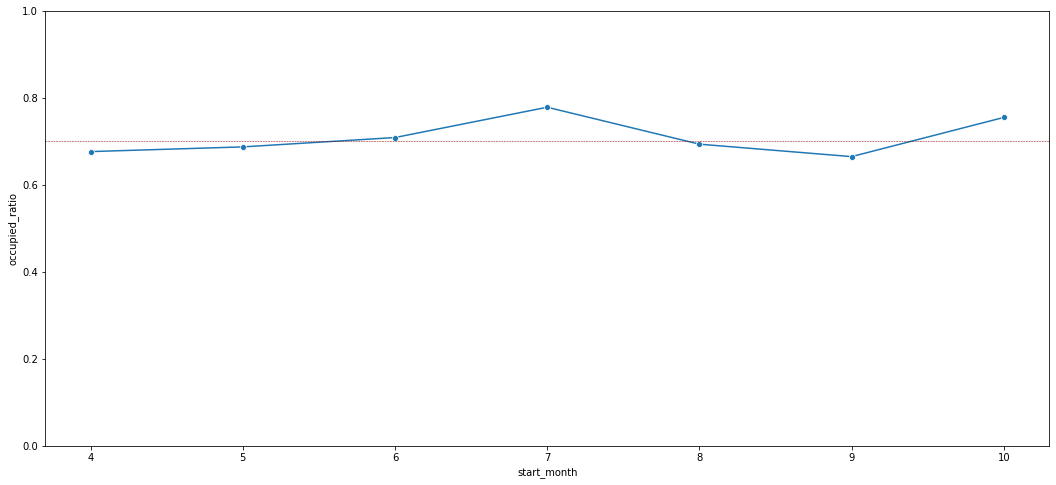

In [20]:
# monthly 관중 점유율

temp_df = df_game.groupby(['start_month']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']



fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'start_month',
    y = 'occupied_ratio',
    marker = 'o'
)

plt.ylim([0, 1])
plt.axhline(0.7, color = 'darkred', linestyle = '--', linewidth = 0.5)  #점유율 70%선 삽입하여 분포 확인
plt.show()

In [21]:
# 요일 컬럼 생성: dayofweek 활용 → 각 요일을 숫자로 표현 해 준다.
df_game['dayofweek'] = df_game['start_date'].dt.dayofweek
#df_game['dayofweek'] = df_game['start_date'].dt.day_name() #요일을 표시
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5


In [22]:
# 숫자들 확인, 해당 날짜가 어떠한 숫자로 요일이 표현되었는 지 확인하고, 구글링을 통해 주말이 어떤 숫자인지 파악하기.
sorted(df_game['dayofweek'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6]

In [23]:
# 주말 여부를 나타내는 구분자 컬럼 생성
df_game['is_weekend'] = np.where( # 엑셀에서의 if함수와 같은 역할: 단, 컬럼 단위
    df_game['dayofweek'] >= 5, # 조건
    1, # 조건이 참( True )일 경우에 반환( return )할 값
    0  # 조건이 거짓( False )일 경우에 반환( return )할 값
)
df_game 

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek,is_weekend
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2,0
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6,1
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6,1
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6,1
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8,0.379763,3,0
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5,0.816786,6,1
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9,0.844010,5,1
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6,0.551677,3,0


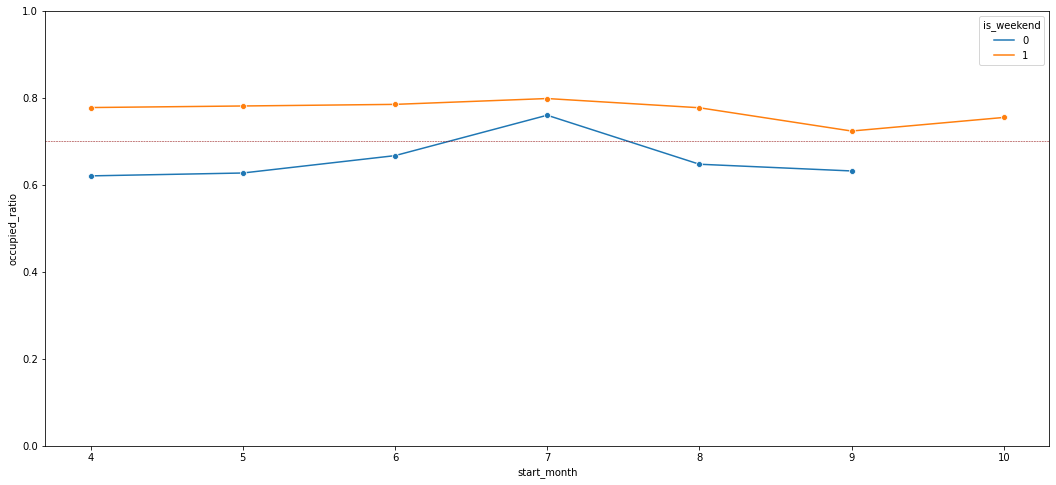

In [26]:
# monthly 관중 점유율

temp_df = df_game.groupby(['start_month', 'is_weekend']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'start_month',
    y = 'occupied_ratio',
    hue = 'is_weekend',
    marker = 'o'
)

plt.ylim([0,1])
plt.axhline(0.7, color = 'darkred', linestyle = '--', linewidth = 0.5)
plt.show()

In [28]:
# weekly 관중 점유율 추세 보기 위해, 해당 날짜가 몇주차인지( week_number ) 나타내는 컬럼 생성
df_game['week_number'] = df_game['start_date'].dt.week  # 데이터 타입이 date인 경우 dt로 접근시 원하는 날짜 형식 추출 수월
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek,is_weekend,week_number
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2,0,34
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6,1,24
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6,1,29
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6,1,30
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5,1,30


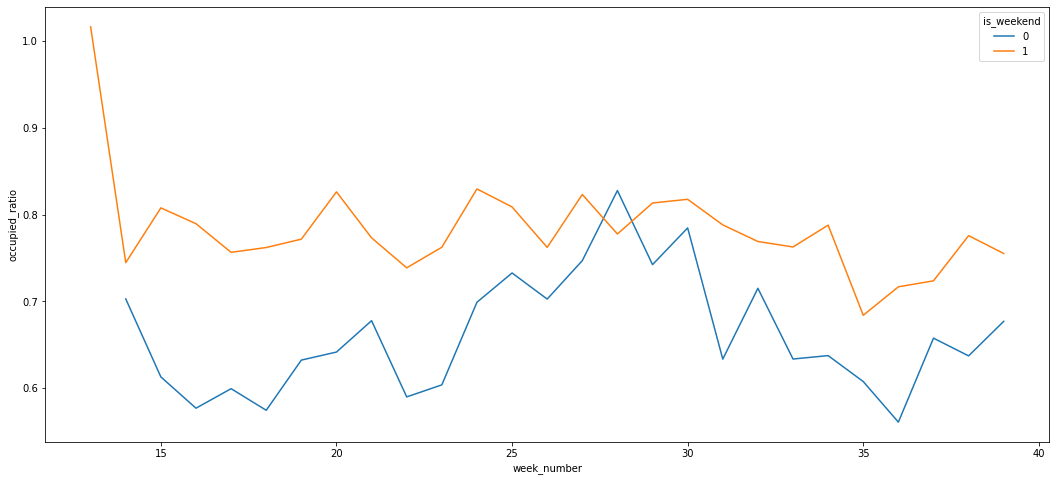

In [29]:
# weekly 관중 점유율

temp_df = df_game.groupby(['week_number', 'is_weekend']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'week_number',
    y = 'occupied_ratio',
    hue = 'is_weekend'
)

plt.show()

In [31]:
# ↑↑↑↑↑↑ 위 그래프는 X축이 1년 중 몇 번째 주에 해당하는 지( 대략 1주 ~ 52주 ) 나타내므로 X축이 익숙하지가 않다.
# 따라서, X축을 보다 친숙한 단위인 날짜로 설정하여 직관성을 높이기 위해, 
# 특정 주차( week_number )의 시작 날짜를 나타내는 컬럼을 생성해 주기
# 'start_date', 'week_number', week_start_date'의 컬럼을 비교 하고 생각 해 보기.
df_game['week_start_date'] = df_game.groupby(['week_number'])['start_date'].transform('min')  # transform = df_game 데이터프레임에 컬럼 추가
#df_game['week_start_date'] = df_game.groupby(['week_number']).agg(컬럼이름 = ('df안에서의 컬럼', '함수'))
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek,is_weekend,week_number,week_start_date
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2,0,34,2016-08-22
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6,1,24,2016-06-13
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6,1,29,2016-07-18
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6,1,30,2016-07-25
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5,1,30,2016-07-25


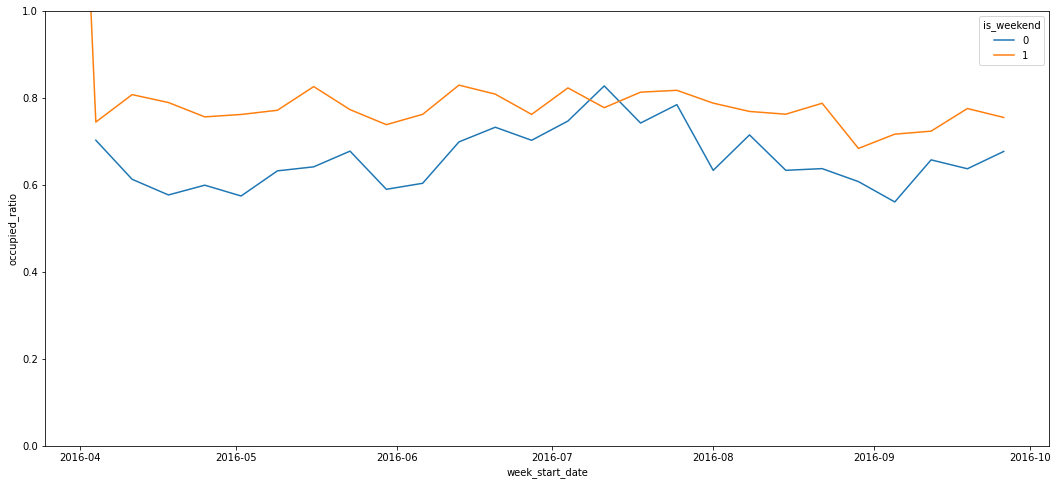

In [32]:
# weekly 관중 점유율

temp_df = df_game.groupby(['week_start_date', 'is_weekend']).agg(
                                    total_attendance = ('attendance', 'sum'),
                                    total_capacity = ('capacity', 'sum')
                                    ).reset_index()

temp_df['occupied_ratio'] = temp_df['total_attendance']/temp_df['total_capacity']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.lineplot(
    data = temp_df,
    x = 'week_start_date',
    y = 'occupied_ratio',
    hue = 'is_weekend'
)
plt.ylim([0, 1])
plt.show()

In [33]:
temp_df.head()

,week_start_date,is_weekend,total_attendance,total_capacity,occupied_ratio
0,2016-04-03,1,70542,69404,1.016397
1,2016-04-04,0,1562365,2222805,0.702880
2,2016-04-04,1,1057421,1419930,0.744699
3,2016-04-11,0,1506239,2457057,0.613026
4,2016-04-11,1,1140000,1411290,0.807772


In [35]:
temp_df[temp_df['week_start_date'].dt.month == 7]

,week_start_date,is_weekend,total_attendance,total_capacity,occupied_ratio
27,2016-07-04,0,2008218,2688361,0.747005
28,2016-07-04,1,1325595,1610356,0.823169
29,2016-07-11,0,351475,424628,0.827725
30,2016-07-11,1,1194901,1536421,0.777717
31,2016-07-18,0,1886223,2540722,0.742396
32,2016-07-18,1,1236615,1520318,0.813392
33,2016-07-25,0,1955301,2491816,0.784689
34,2016-07-25,1,1271519,1555088,0.817651


### 컬럼생성: 경기시간

In [ ]:
# 경기 시간을 전처리 해 주기: HH:MM 형태로 표기되어 있는 값을, 연산할 수 있도록 분 단위로 통일시켜주기
df_game[['hours', 'minutes']] = df_game['duration'].str.split(':', n = 1, expand = True)
df_game.head()

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek,is_weekend,week_number,week_start_date,hours,minutes
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2,0,34,2016-08-22,2,44
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6,1,24,2016-06-13,3,00
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6,1,29,2016-07-18,3,02
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6,1,30,2016-07-25,2,43
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5,1,30,2016-07-25,3,42


In [ ]:
# 생성된 컬럼들의 데이터 타입 확인
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   game_id          2428 non-null   object        
 1   start_at         2428 non-null   object        
 2   attendance       2428 non-null   int64         
 3   capacity         2428 non-null   int64         
 4   ground_name      2428 non-null   object        
 5   duration         2428 non-null   object        
 6   inning           2428 non-null   int64         
 7   home_team        2428 non-null   object        
 8   start_date       2428 non-null   datetime64[ns]
 9   start_month      2428 non-null   int64         
 10  occupied_ratio   2428 non-null   float64       
 11  dayofweek        2428 non-null   int64         
 12  is_weekend       2428 non-null   int64         
 13  week_number      2428 non-null   int64         
 14  week_start_date  2428 non-null   datetim

In [ ]:
# 연산할 수 있도록 문자열 데이터를 숫자형 데이터로 바꿔주기
df_game['hours'] = df_game['hours'].astype('int')
df_game['minutes'] = df_game['minutes'].astype('int')

# 숫자형으로 바뀐 데이터를 연산하여 분 단위로 경기 시간을 통일시켜주기
df_game['duration_in_minute'] = df_game['hours']*60 + df_game['minutes']
df_game

,game_id,start_at,attendance,capacity,ground_name,duration,inning,home_team,start_date,start_month,occupied_ratio,dayofweek,is_weekend,week_number,week_start_date,hours,minutes,duration_in_minute
0,000f209b-7132-4020-a2b6-dec9196a1802,2016-08-24 23:10:00 UTC,16100,42319,Great American Ball Park,2:44,9,Reds,2016-08-24,8,0.380444,2,0,34,2016-08-22,2,44,164
1,0024139e-3dde-481b-92f5-a29af99d5ea3,2016-06-19 00:15:00 UTC,41424,41072,Wrigley Field,3:00,9,Cubs,2016-06-19,6,1.000000,6,1,24,2016-06-13,3,0,180
2,00458b29-e5a4-4fcc-ac97-14ac0553bb63,2016-07-24 00:10:00 UTC,46195,50398,Coors Field,3:02,9,Rockies,2016-07-24,7,0.916604,6,1,29,2016-07-18,3,2,182
3,005191cd-d8a8-4843-9255-d7a217432e82,2016-07-31 17:35:00 UTC,21545,49586,Turner Field,2:43,9,Braves,2016-07-31,7,0.434498,6,1,30,2016-07-25,2,43,163
4,00a9460b-9d38-4636-b8aa-14a8a2d610a7,2016-07-30 00:10:00 UTC,23983,39021,Target Field,3:42,12,Twins,2016-07-30,7,0.614618,5,1,30,2016-07-25,3,42,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,ff6b68b2-dbf3-402e-b133-efadeee5c092,2016-08-18 01:40:00 UTC,18469,48633,Chase Field,2:53,9,Diamondbacks,2016-08-18,8,0.379763,3,0,33,2016-08-15,2,53,173
2424,ff7531a7-622b-47a0-9778-83c683b21f90,2016-05-01 01:10:00 UTC,45740,56000,Dodger Stadium,3:06,9,Dodgers,2016-05-01,5,0.816786,6,1,17,2016-04-25,3,6,186
2425,ff8e6e3d-0af5-4fd5-842a-f3697ae49eef,2016-09-24 00:10:00 UTC,35364,41900,Miller Park,2:48,9,Brewers,2016-09-24,9,0.844010,5,1,38,2016-09-19,2,48,168
2426,ffbd6ecc-82e1-4e5d-9bd1-4ea210be5992,2016-06-09 00:10:00 UTC,21527,39021,Target Field,3:05,9,Twins,2016-06-09,6,0.551677,3,0,23,2016-06-06,3,5,185


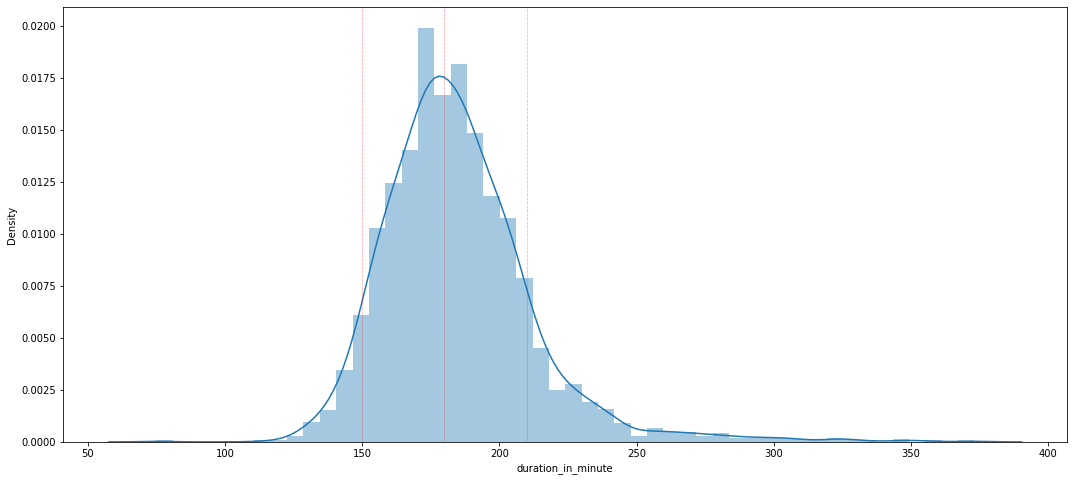

CPU times: user 363 ms, sys: 88.8 ms, total: 452 ms
Wall time: 375 ms


In [ ]:
%%time

# 경기시간 분포 그려보기

fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (18, 8))

sns.distplot(df_game['duration_in_minute'])

plt.axvline(150, color = 'red', linestyle = ':', linewidth = 0.5)
plt.axvline(180, color = 'red', linestyle = ':', linewidth = 0.5)
plt.axvline(210, color = 'red', linestyle = ':', linewidth = 0.5)

plt.show()

In [ ]:
# 각 경기장 별로, 평균 경기시간이 얼마나 다른 지 확인 해 보기
# 투수에게 유리한 경기장과, 타자에게 유리한 경기장이 경기 시간으로 잘 나타나는 지 확인 해 볼 수 있다.
# e.g., 투수에게 유리한 경기장은 경기 시간이 짧고, 타자에게 유리한 경기장은 경기시간이 길 것으로 예상할 수 있음


temp_df = df_game.groupby(['ground_name']).agg(
    total_duration_time = ('duration_in_minute', 'sum'),
    game_cnts = ('game_id', 'nunique'),
).reset_index()

temp_df['avg_game_duration'] = temp_df['total_duration_time']/temp_df['game_cnts']
temp_df.sort_values(by = 'avg_game_duration', ascending = False)

,ground_name,total_duration_time,game_cnts,avg_game_duration
3,Chase Field,15966,81,197.111111
9,Fenway Park,15877,81,196.012346
7,Coors Field,15684,81,193.629630
27,Turner Field,15388,80,192.350000
20,PETCO Park,15292,81,188.790123
4,Citi Field,15272,81,188.543210
21,PNC Park,15241,81,188.160494
15,Miller Park,15221,81,187.913580
17,Nationals Park,15217,81,187.864198
0,AT&T Park,15190,81,187.530864


## 1-2. 야구선수
    연봉 정보가 있었다면 더 재미있는 EDA 가 되었을 것으로 예상..


In [ ]:
# 야구 선수에 관한 컬럼들을 df_base에서 적당히 가져오기
df_player = df_base[['game_id',
    'venue_name',
    'venue_surface',
    'inning_number',
    'inning_half',
    'pitch_speed',
    'outcome_description',
    'hitter_id',
    'hitter_weight',
    'hitter_height',
    'hitter_bat_hand',
    'pitcher_id',
    'pitcher_throw_hand',
    'pitch_type',
    'pitch_type_description',
    'is_hit',]]

df_player

,game_id,venue_name,venue_surface,inning_number,inning_half,pitch_speed,outcome_description,hitter_id,hitter_weight,hitter_height,hitter_bat_hand,pitcher_id,pitcher_throw_hand,pitch_type,pitch_type_description,is_hit
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Foul Ball,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,0
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Double,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,1
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Single,3e39fe20-6dca-4894-807b-1ce76ff93e29,190,70,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Triple,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,90,Strike Swinging,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761613,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,3,BOT,93,Strike Looking,9880d4de-4cd4-47a5-8996-61d52a35ea2a,190,73,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0
761614,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,6,BOT,91,Foul Ball,ff750663-5eb3-4006-9d6a-2660397ff595,235,75,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0
761615,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,TOP,89,Strike Looking,39212be3-ce0d-4f7f-ab1a-c687ca189edd,195,73,L,30d360f6-588a-4e82-aa4a-f8cd6d1f9b93,L,SL,Slider,0
761616,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,BOT,94,Ground Out,d89e0030-393c-4433-9779-25aed817abb5,170,69,L,aacf4eee-3371-4ec4-870a-9012fd69e629,R,FA,Fastball,0


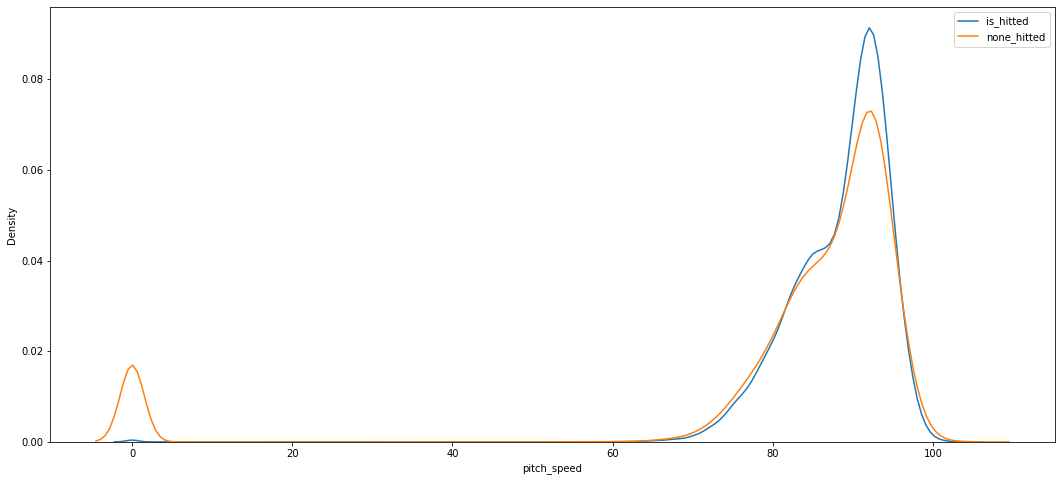

CPU times: user 4.42 s, sys: 292 ms, total: 4.72 s
Wall time: 4.47 s


In [ ]:
%%time

# 안타가 생성된 경우와 그렇지 않은 경우의 투구 속도 분포

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.distplot(df_player[df_player.is_hit == 1]['pitch_speed'], hist = False, label = 'is_hitted')
sns.distplot(df_player[df_player.is_hit == 0]['pitch_speed'], hist = False, label = 'none_hitted')

plt.legend()
plt.show()

In [ ]:
# 미국 기록이므로 단위 문화가 다르다
# mile → km // pound → kg // inch → cm 로 변경( 구글링으로 변환 기준 검색 )
# 많은 건을 변환시 단위 변환 라이브러리 활용하는것이 편리

df_player['pitch_speed_km'] = df_player['pitch_speed']*1.609344 # mile → km
df_player['hitter_weight_kg'] = df_player['hitter_weight']*0.453592 # pound → km
df_player['hitter_height_cm'] = df_player['hitter_height']*2.54 # inch → km
df_player

,game_id,venue_name,venue_surface,inning_number,inning_half,pitch_speed,outcome_description,hitter_id,hitter_weight,hitter_height,hitter_bat_hand,pitcher_id,pitcher_throw_hand,pitch_type,pitch_type_description,is_hit,pitch_speed_km,hitter_weight_kg,hitter_height_cm
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Foul Ball,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,0,131.966208,115.66596,187.96
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,82,Double,5fb27d81-527a-4e98-b0f3-efdc52f974c8,255,74,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SL,Slider,1,131.966208,115.66596,187.96
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Single,3e39fe20-6dca-4894-807b-1ce76ff93e29,190,70,R,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,146.450304,86.18248,177.80
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,91,Triple,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,1,146.450304,90.71840,182.88
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,Coors Field,grass,8,TOP,90,Strike Swinging,63df7794-746c-4869-8e54-0addccbb376f,200,72,L,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,R,SI,Sinker,0,144.840960,90.71840,182.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761613,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,3,BOT,93,Strike Looking,9880d4de-4cd4-47a5-8996-61d52a35ea2a,190,73,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0,149.668992,86.18248,185.42
761614,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,6,BOT,91,Foul Ball,ff750663-5eb3-4006-9d6a-2660397ff595,235,75,L,e5cfe3b2-6596-4f08-bba7-f107ecae63c2,R,FA,Fastball,0,146.450304,106.59412,190.50
761615,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,TOP,89,Strike Looking,39212be3-ce0d-4f7f-ab1a-c687ca189edd,195,73,L,30d360f6-588a-4e82-aa4a-f8cd6d1f9b93,L,SL,Slider,0,143.231616,88.45044,185.42
761616,b6e3f753-e5ec-443d-869f-90cf53d4fdb7,Turner Field,grass,7,BOT,94,Ground Out,d89e0030-393c-4433-9779-25aed817abb5,170,69,L,aacf4eee-3371-4ec4-870a-9012fd69e629,R,FA,Fastball,0,151.278336,77.11064,175.26


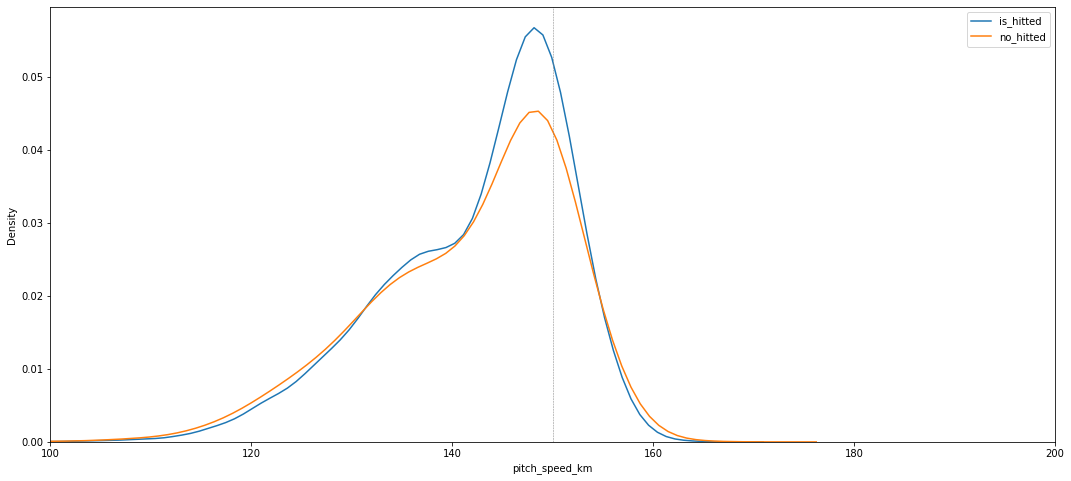

CPU times: user 4.52 s, sys: 366 ms, total: 4.89 s
Wall time: 4.53 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))

sns.distplot(df_player[df_player.is_hit == 1]['pitch_speed_km'], label = 'is_hitted', hist = False)
sns.distplot(df_player[df_player.is_hit == 0]['pitch_speed_km'], label = 'no_hitted', hist = False)

plt.legend()
plt.xlim([100, 200])
plt.axvline(150, color = 'gray', linewidth = 0.5, linestyle = '--')
plt.show()

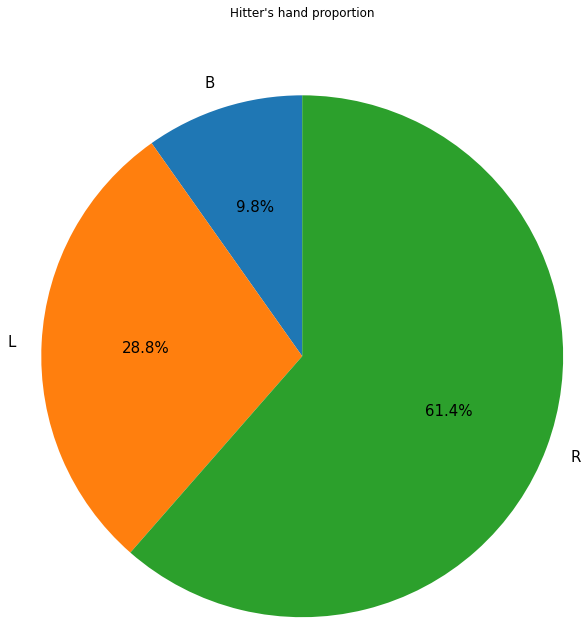

In [ ]:
# 왼손타자 및 오른손 타자의 분포 확인
temp_df = df_player.groupby(['hitter_bat_hand']).agg(player_cnts = ('hitter_id', 'nunique')).reset_index()
temp_df['player_ratio'] = temp_df['player_cnts']/temp_df.player_cnts.sum()
# temp_df
fig, ax = plt.subplots(nrows = 1, ncols = 1)

plt.pie(
    x = temp_df.player_ratio,
    labels = temp_df.hitter_bat_hand,
    startangle = 90,
    radius = 3, 
    autopct = '%1.1f%%',
    textprops = {'fontsize': 15}
)
plt.title('Hitter\'s hand proportion\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()

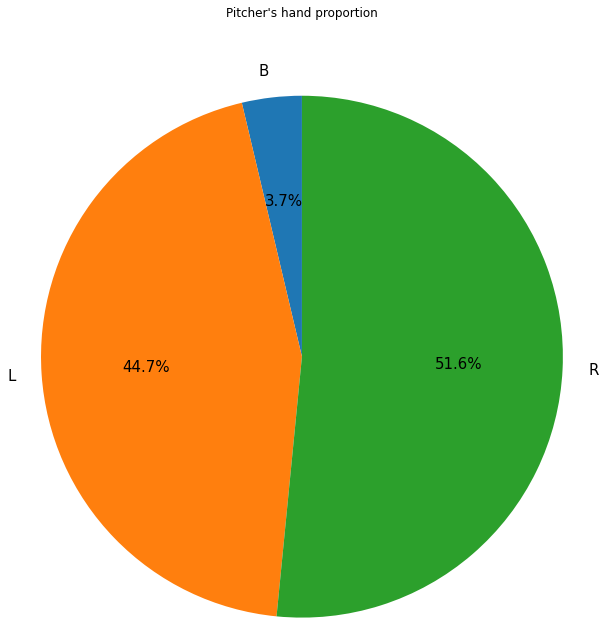

In [ ]:
# 왼손투수 및 오른손 투수의 분포 확인
temp_df = df_player.groupby(['pitcher_throw_hand']).agg(player_cnts = ('hitter_id', 'nunique')).reset_index()
temp_df['player_ratio'] = temp_df['player_cnts']/temp_df.player_cnts.sum()

fig, ax = plt.subplots(nrows = 1, ncols = 1)

plt.pie(
    x = temp_df.player_ratio,
    labels = temp_df.pitcher_throw_hand,
    startangle = 90,
    radius = 3,
    autopct = '%1.1f%%',
    textprops = {'fontsize': 15}
)
plt.title('Pitcher\'s hand proportion\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()

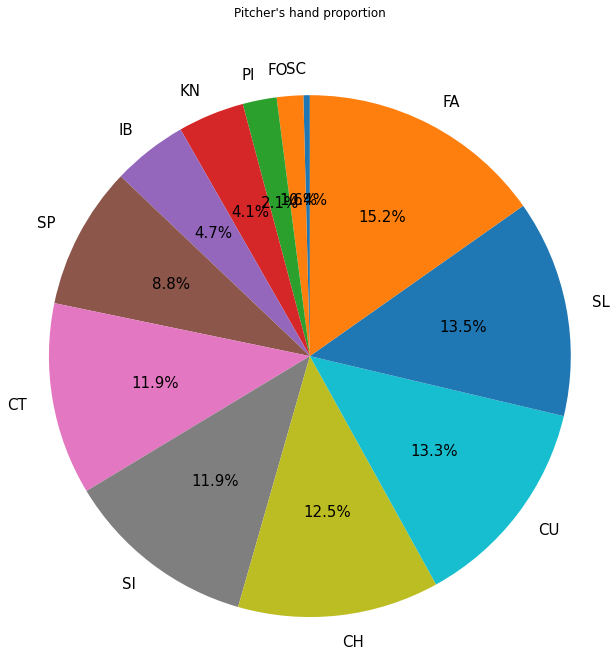

In [ ]:
# 투수가 던진 구종 분포 확인

temp_df = df_player.groupby(['pitch_type']).agg(player_cnts = ('hitter_id', 'nunique')).reset_index()
temp_df['player_ratio'] = temp_df['player_cnts']/temp_df.player_cnts.sum()
temp_df = temp_df.sort_values(by = 'player_ratio', ascending = True, ignore_index = True)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

plt.pie(
    x = temp_df.player_ratio,
    labels = temp_df.pitch_type,
    startangle = 90,
    radius = 3,
    autopct = '%1.1f%%',
    textprops = {'fontsize': 15}
)
plt.title('Pitcher\'s hand proportion\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')
plt.show()